<a href="https://colab.research.google.com/github/franckbizimana/Wamungu/blob/main/Goodlife_Fitness_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive Statistics - Goodlife Fitness Case Study
## Context :
The market research team at Golden Ratio is assigned the task to identify customer profiles for each membership offered by Goodlife Fitness. The market research team decides to investigate whether there are differences across the membership options with respect to customer characteristics. The team decides to collect data on individuals who purchased a membership at a Goodlife Fitness. The data is stored in the GoodlifeFitness.csv file.

## Objective :
Perform descriptive analysis to create a customer profile for each Goodlife Fitness membership option.

### The team identifies the following customer variables to study:
  - Type: Basic, Care, or Premium membership options
  - Age: Age of the customer in years
  - Gender: Male or Female  
  - Education: Education of the customer in years
  - MaritalStatus: Single or partnered
  - WeeklyUse: The average number of times the customer plans to visit the gym each week
  - Fitness: Self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.
  - Income: Annual household income  
  - Kms: Average number of kms the customer expects to walk/run each week


### Import the necessary libraries

In [1]:
# Load the necessary packages
import numpy as np
import pandas as pd

### Read the dataset

In [2]:
# Load the GoodlifeFitness.csv Dataset
data = pd.read_csv('GoodlifeFitness.csv')

In [3]:
data.head()

,Type,Age,Gender,Education,MaritalStatus,WeeklyUse,Fitness,Income,Kms
0,Basic,18,Male,14,Single,3,4,29562,180
1,Basic,19,Male,15,Single,2,3,31836,121
2,Basic,19,Female,14,Partnered,4,3,30699,106
3,Basic,19,Male,12,Single,3,3,32973,137
4,Basic,20,Male,13,Partnered,4,2,35247,76


### Printing the basic information

In [4]:
# check for nulls and other basic info from the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   WeeklyUse      180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Kms            180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Observations:**
- There are 180 observations and 9 columns (6 of them are numerical and 3 are categorical).
- All the column have 180 non-null values i.e. there are no missing values in the data.

## <span style="color:crimson">Univariate Analysis</span>

### Check the five point summary statistics

In [5]:
# check analytical summary of the dataset
data.describe()

,Age,Education,WeeklyUse,Fitness,Income,Kms
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,166.127778
std,6.943498,1.617055,1.084797,0.958869,16506.684226,83.438067
min,18.000000,12.000000,2.000000,1.000000,29562.000000,34.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,106.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,151.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,184.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,579.000000


**Observations:**

- Average age of customers is 29 years. And, the age ranges from 18 to 50.
- The average annual income of a customer is 53K. It has a range of values from 30K to 104K, which again shows a good diversity of customers.
- Median gym usage is 3 days, that means 50% of the cutstomer are going to use the gym for less than or equal to 3 days in a week.  

In [6]:
# check stats for categorical data
data.describe(include=(object))
# data.describe(include='all')

,Type,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,Basic,Male,Partnered
freq,80,104,107


### Plotting distribution for numerical columns

<Axes: ylabel='Frequency'>

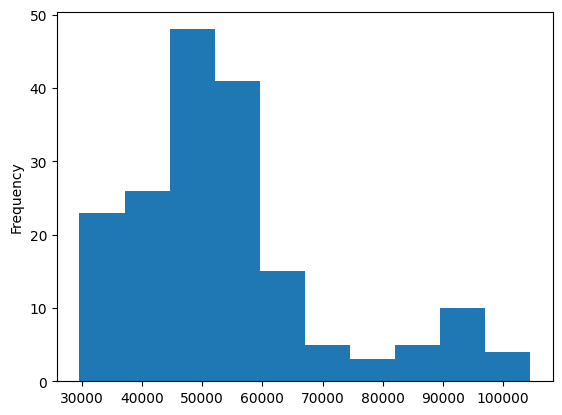

In [7]:
# Plot the distribution of Income
data['Income'].plot(kind='hist')

**Observations:**
- The annual income of the people is right skewed.
- The range of income of people is 30k to 104k, while majority of the customers have income between 44k to 58k.

<Axes: ylabel='Frequency'>

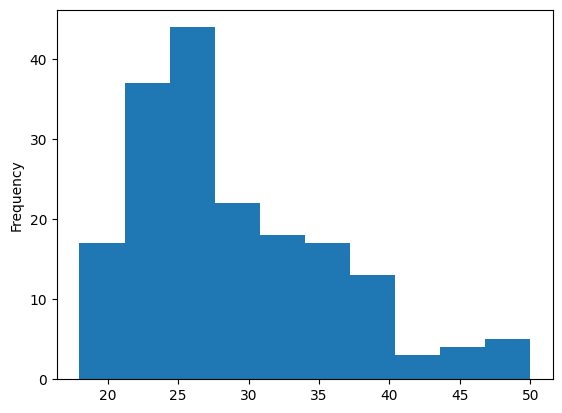

In [8]:
# Plot the distribution of Age
data['Age'].plot(kind='hist')

**Observations**
- The age distribution is also right skewed. there are few people with age greater than 40 who focus on their fitness.  
- Most of the customers are aged between 20 to 30, which signifies the people who are young tend to hit the gym more.

<Axes: >

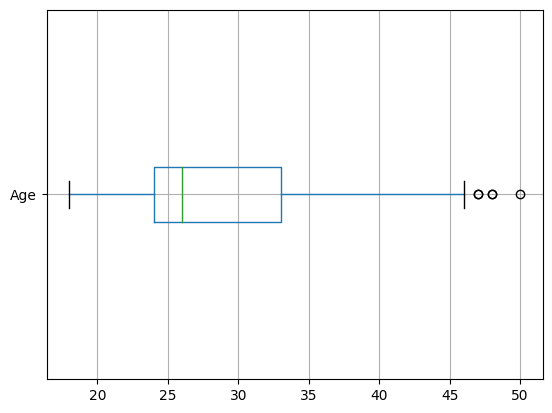

In [9]:
# plotting a boxplot for Age
data.boxplot('Age', vert=False)

### Checking value count of each categorical column

In [10]:
# check value count for Type
data['Type'].value_counts()

,count
Type,
Basic,80
Care,60
Premium,40


In [11]:
# to get the percentage user normalize = True
data['Type'].value_counts(normalize=True)

,proportion
Type,
Basic,0.444444
Care,0.333333
Premium,0.222222


In [12]:
cols = ['Type','Gender','MaritalStatus']
for i in cols:
    print(data[i].value_counts(normalize=True)*100) #normalized=True gives the % of each category in the column
    print('-'*35)

Type
Basic      44.444444
Care       33.333333
Premium    22.222222
Name: proportion, dtype: float64
-----------------------------------
Gender
Male      57.777778
Female    42.222222
Name: proportion, dtype: float64
-----------------------------------
MaritalStatus
Partnered    59.444444
Single       40.555556
Name: proportion, dtype: float64
-----------------------------------


**Observations:**
- Most memberships sold are Basic (about 45%), while the least sold is the premium membership which is only 22%.
- There are about 57% of the customers who are male and rest are female.
- 60% of the people who bought the membership have partners and rest are single.  

## <span style="color:crimson">Bivariate analysis</span>

<Axes: title={'center': 'Income'}, ylabel='Type'>

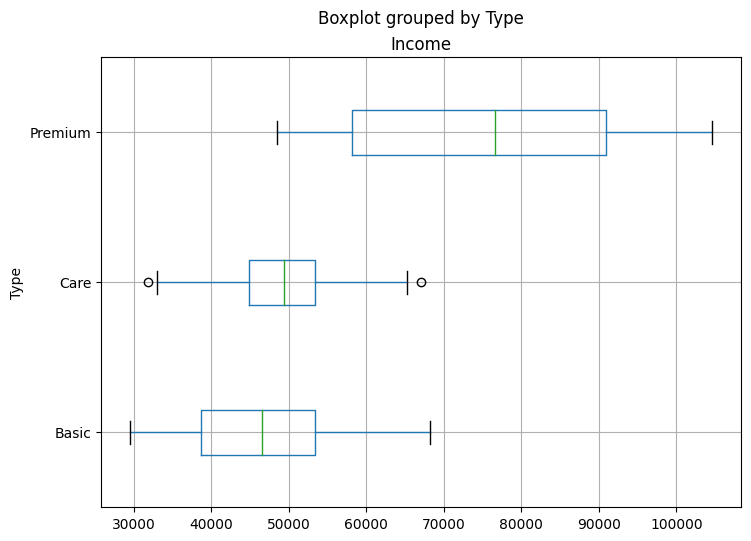

In [13]:
# plot a boxplot of income vs membership type
data.boxplot(by='Type',column = 'Income', vert=False, figsize=(8,6))

**Observation**
- Premium membership is bought by the people having an income range from 60K to 90k.
- Basic membership is mostly consider by the people who have lower income level.

<Axes: title={'center': 'Age'}, ylabel='Gender'>

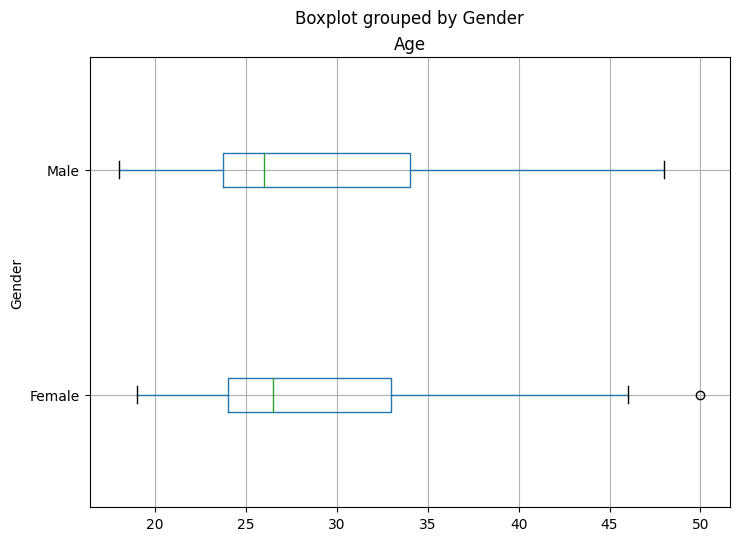

In [14]:
# plot a boxplot of Age vs Gender type
data.boxplot(by='Gender',column = 'Age', vert=False, figsize=(8,6))

**Observation:**
- The age distribution for the people who buy membership is same for both male and female with a few outliers for females.

##  <span style="color:crimson">Multi-Variate Analysis</span>

In [15]:
# Using .crosstab analyse data across Gender and Type
#pd.crosstab(data['Type'],[data['Gender'],data['MaritalStatus']])
pd.crosstab(data['Type'],[data['Gender']])

Gender,Female,Male
Type,,
Basic,40,40
Care,29,31
Premium,7,33


**Observation:**
- It can be clearly seen from the table that the Basic membership is popular among both males and females.
- Premium membership is popular among males.

In [16]:
# using .pivot_table analyze data by income and type
# pd.pivot_table(data, values='Income', index=['Type', 'Gender'], columns=['MaritalStatus'])
#pd.pivot_table(data,values='Income', index=['Type', 'Gender'])
pd.pivot_table(data, values='Income', index=['Type'])

,Income
Type,
Basic,46418.025
Care,48973.650
Premium,75441.575


**Observations:**
- The average income of customers who bought Basic and Care is on the lower side as compared to the customers who bought Premium memberships.
- The people who bought Premium memberships, there is a big difference in the income level of the people

**Inference:**
- The Income variable is a good predictor to find the preference of the customers.

#### Let's check the exact value of correlation between the variables using correlation martix.


In [22]:
corr = data.corr()
corr

ValueError: could not convert string to float: 'Basic'

<Axes: xlabel='Age', ylabel='Income'>

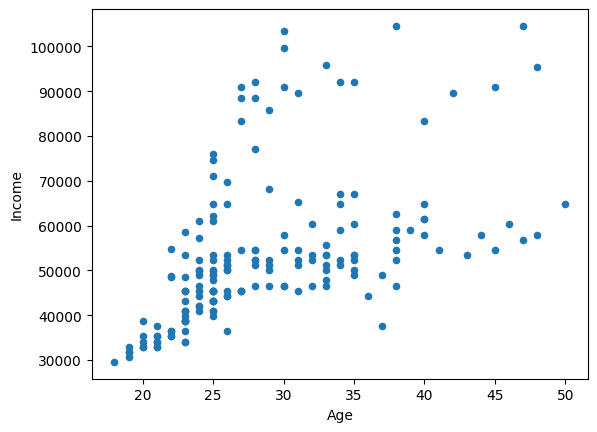

In [20]:
# Scatter plot using Pandas
data.plot.scatter('Age', 'Income')

**Observations:**
- Kms and WeeklyUse , kms and Fitness are highly correlated with each other, which makes sense as more useage, leads to more kms hence results better fitness.
- There is a high correlation between income and education too, signifies that the people with good education level tend to have higher income.
- Fitness and WeeklyUse are also highly correlated.


### Conclusions:
- Premium membership is the least sold product among the three. Also, it is mostly popular among male customers, and is preferred by customers who are planning to run more, having good fitness, and higher income range.
- Basic Membership is most popular which is preferred among customers having lower income range.
- Care Membership is slightly less popular than Basic.